# Exploratory Data Analysis (EDA) for Rossmann Pharmaceutical Data Analysis
## What this notebook does is:

- Load the data
- Perform basic statistics on the data

In [1]:
# Import necessary libraries
import sys
import os
import pandas as pd

In [2]:
# Get the current working directory of the project
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# # Insert the path to the Scripts directory
# sys.path.insert(0, os.path.join(parent_dir, 'Scripts'))

# print(sys.path)

c:\Users\HP\Desktop\KAIM-Cohort-3\Week 4\rossmann-pharmaceutical-ml-and-dl-sales-forecasting\notebooks
c:\Users\HP\Desktop\KAIM-Cohort-3\Week 4\rossmann-pharmaceutical-ml-and-dl-sales-forecasting


In [3]:
# Import the scripts
from scripts.data_cleaning import handle_missing_values, remove_outliers
from scripts.feature_engineering import add_holiday_flag, create_time_features
from scripts.analysis import sales_correlation, promo_effect
from scripts.visualizations import plot_sales_distribution, plot_correlation

In [4]:
# Load data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')


C:\Users\HP\AppData\Local\Temp\ipykernel_12992\143293476.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


In [5]:
# Data cleaning
train = handle_missing_values(train)
train = remove_outliers(train, 'Sales')

c:\Users\HP\Desktop\KAIM-Cohort-3\Week 4\rossmann-pharmaceutical-ml-and-dl-sales-forecasting\scripts\data_cleaning.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['StateHoliday'].fillna(-1, inplace=True)


In [6]:
# Feature engineering
holidays = ['2015-12-25', '2015-01-01']
train = add_holiday_flag(train, holidays)
train = create_time_features(train)

In [7]:
# Exploratory analysis
print("Sales-Customer Correlation:", sales_correlation(train))
promo_sales, no_promo_sales = promo_effect(train)
print(f"Promo Sales: {promo_sales}, No Promo Sales: {no_promo_sales}")

Sales-Customer Correlation: 0.8868414857905177
Promo Sales: 7512.835578338434, No Promo Sales: 4250.614772321443


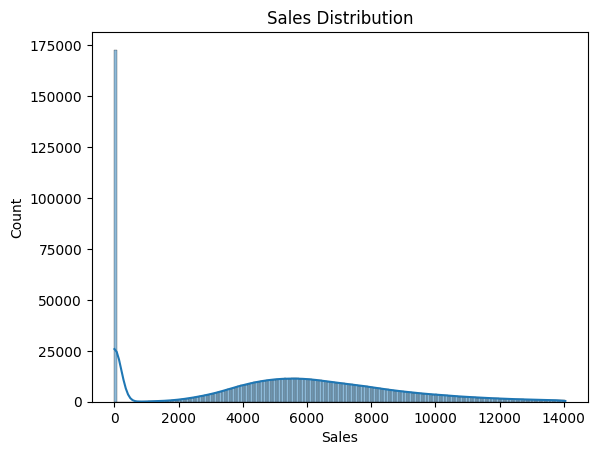

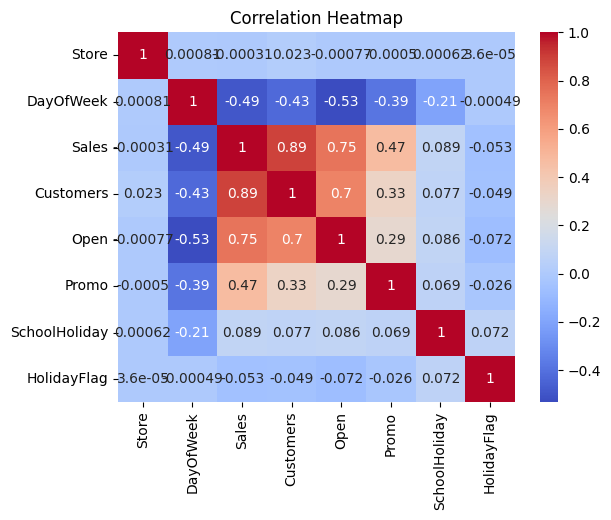

In [8]:

# Visualizations
plot_sales_distribution(train)
plot_correlation(train)